## Notebook by Hari Prasath V

## Task Explantion

Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually.

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

## Load data

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


let's check for missing values.

In [3]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

THe no of species is the answer we are supposed to find by the clustering algorithm and id column is pretty much useless for the clustering. So lets remove those. 

In [5]:
x = data.iloc[:, 1:-1]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Finding optimum number of clusters

In [6]:
cluster_num = list(range(1, 10))
inertia = []
for c in cluster_num:
    model = KMeans(n_clusters = c, init = 'k-means++', n_init = 15, max_iter = 100)
    model.fit(x)
    inertia.append(model.inertia_)

Text(0, 0.5, 'within-Cluster Sum of Squares')

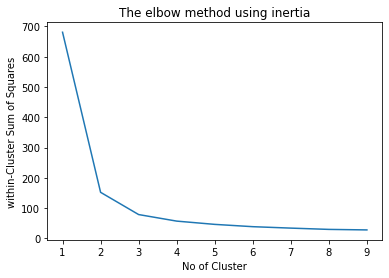

In [7]:
plt.plot(cluster_num, inertia)
plt.title('The elbow method using inertia')
plt.xlabel('No of Cluster')
plt.ylabel('within-Cluster Sum of Squares')

In [8]:
model = KMeans(n_clusters = 3, init = 'k-means++', n_init = 20, max_iter = 200).fit(x)

In [9]:
x['cluster'] = model.labels_
x['cluster'].value_counts(sort = False)

0    50
1    38
2    62
Name: cluster, dtype: int64

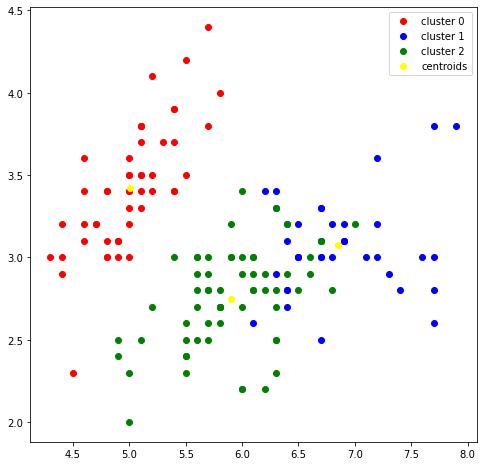

In [10]:
fig, ax = plt.subplots(figsize = (8,8))
color = ['red', 'blue', 'green']
label = list(range(len(np.unique(x['cluster']))))
for i in range(len(np.unique(x['cluster']))):
    plt.scatter(x.loc[x['cluster'] == i, 'SepalLengthCm'], 
                x.loc[x['cluster'] == i, 'SepalWidthCm'], 
               color = color[i], 
            label = 'cluster {}'.format(i))
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = 'yellow', label = 'centroids')
plt.legend()

Thus the optimum number of clusters is 3